# Project 7

 Author: Mindy Cruz

[ Mindy's Project 7 Repo]( https://github.com/mindy0cruz/datafun-07-ml)


In this final module, you'll employ machine learning (ML). At a high-level, there are three general categories of ML: supervised, unsupervised, and reinforcement learning. We'll employ a type of supervised learning, simple linear regression, to train a model using all available data and use the resulting model (a "best-fit" straight line) to make predictions. Python makes it easy! 

In this project, you'll:

Build a model
Make predictions
Visualize the model
Publish your insights

Import Dependencies


In [82]:
import jupyter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics as stats
import scipy as sp
from scipy import stats
import statsmodels as sm
import logging
import sklearn
from sklearn import model_selection 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

# Pt 1: Chart a Straight Line

Store Fahrenheit/Celsius pair as tuple in 'temps':

In [83]:
c = lambda f: 5/9*(f-32)
temps = [(f, c(f)) for f in range(0,101,10)]

Chart:

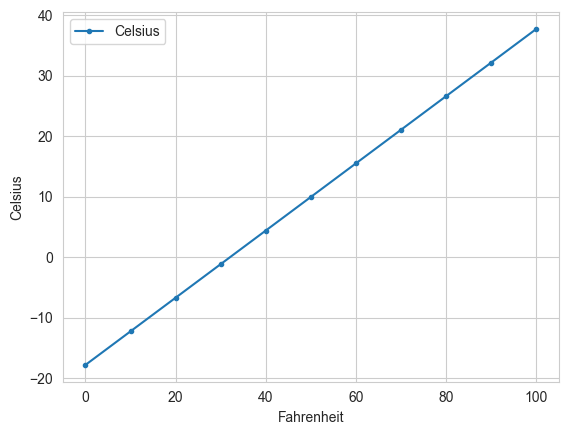

In [84]:
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

# Pt 2: Predic Average High Temp in NYC in January

### Section 1: Data Aquistion

In [85]:
nyc = pd.read_csv(r'C:\Users\cruzm\Documents\datafun-07-ml\ave_hi_nyc_jan_1895-2018.csv')


### Section 2: Data Inspection

In [86]:
#First 5 rows
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [87]:
#Last 5 Rows
nyc.tail()


,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3: Data Cleanup

In [88]:
#Rename columns
nyc.columns = ['Date', 'Temperature', 'Anomaly']

nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [89]:
#truncate date
nyc.Date = nyc.Date.floordiv(100)
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Section 4: Descriptive Statistics

In [90]:
#Set the display precision to 2 decimial places
pd.set_option('display.precision', 2)

# Calculate basic descriptive stats for the dataset
nyc.Temperature.describe()


count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5: Build a Model

In [91]:
# linear regression
linear_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature)
#slope
print('Slope:', linear_regression.slope)
#intercept
print('Intercept:', linear_regression.intercept)


Slope: 0.014771361132966163
Intercept: 8.694993233674289


### Section 6: Predictions

In [92]:
# Predict Avg high temp in Jan for 2024
print('Average Fahrenheit Temp for 2024:', linear_regression.slope*2024+linear_regression.intercept)

Average Fahrenheit Temp for 2024: 38.5922281667978


### Section 7: Visualizations

Text(0.5, 1.0, 'High Temp Avg NYC')

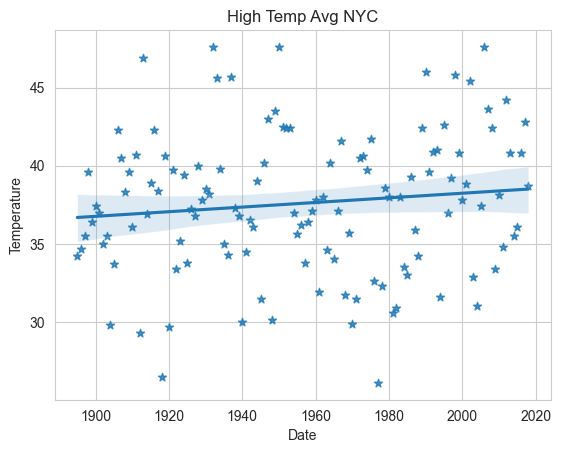

In [93]:
# generate scatter plot with best fit line
sns.set_style('whitegrid')
# set axes
axes = sns.regplot (x=nyc.Date, y= nyc.Temperature, marker= '*')
axes.set_title('High Temp Avg NYC')

(10.0, 70.0)

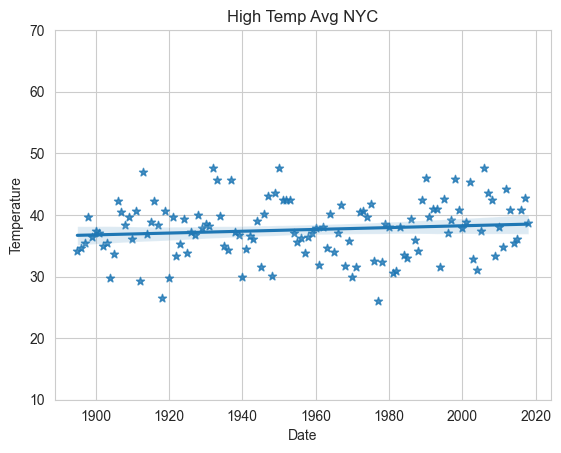

In [94]:
# scale axis
sns.set_style('whitegrid')
axes = sns.regplot (x=nyc.Date, y= nyc.Temperature, marker= '*')
axes.set_title('High Temp Avg NYC')
axes.set_ylim(10,70)